# Лабораторна робота №1. Реалізація BFS для обходу вершин графу

Завдання: 

- Здійснити обхід вершин графу, показаного на мал. нижче.

<img src="../img/task_1_1.png" alt="task_1_1" width="500"/>

- Під час встановлення зв'язків суміжності між сусідами, врахувати спрямованість зв'язків (для поточної вершини суміжними є ті вершини, до яких від поточної йде спрямований зв'язок). 
- Вивести результат обходу в консоль. 
- Результат роботи програми (код та скріншот консолі) занести у звіт.

## 1. Створимо клас Vertex для опису вершин дерева (графу)

In [2]:
class Vertex:
    def __init__(self, name):
        self.name = name
        self.visited = False
        self.adjacency_list = []

    def add_neighbor(self, vertex):
        self.adjacency_list.append(vertex)

    def __str__(self):
        return self.name

## 2. Створимо клас  BreadthFirstSearch для реалізації алгоритму

In [3]:
from collections import deque

class BreadthFirstSearch:
    def traverse(self, root):
        queue = deque([root])
        root.visited = True

        while queue:
            actual_vertex = queue.popleft()
            print(f"Actual visited vertex: {actual_vertex}")

            for neighbor in actual_vertex.adjacency_list:
                if not neighbor.visited:
                    neighbor.visited = True
                    queue.append(neighbor)

## 3. Створимо клас Graph для зберігання інформації про граф

In [20]:
class Graph:
    def __init__(self, edges=None, directed=False):
        self.vertices = {}
        self.directed = directed
        if edges:
            self.add_edges(edges)

    def add_vertex(self, name):
        if name not in self.vertices:
            self.vertices[name] = Vertex(name)

    def add_edges(self, edges):
        for from_vertex, to_vertices in edges:
            self.add_vertex(from_vertex)
            for to_vertex in to_vertices:
                self.add_vertex(to_vertex)
                self.vertices[from_vertex].add_neighbor(
                    self.vertices[to_vertex])
                if not self.directed:
                    self.vertices[to_vertex].add_neighbor(
                        self.vertices[from_vertex])

    def get_vertex(self, name):
        return self.vertices.get(name)

    def reset_visits(self):
        for vertex in self.vertices.values():
            vertex.visited = False

## 4. Тестування роботи алгоритму BFS

In [5]:
%pip install networkx matplotlib -q

Note: you may need to restart the kernel to use updated packages.


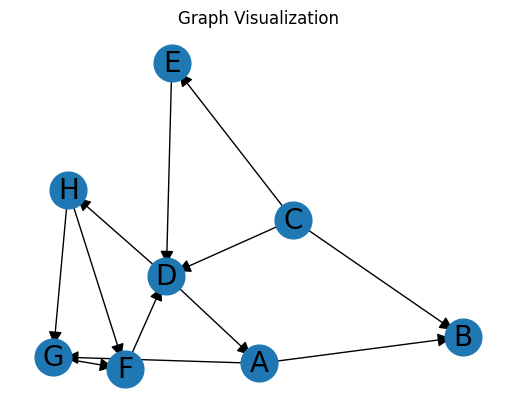

Actual visited vertex: A
Actual visited vertex: B
Actual visited vertex: G
Actual visited vertex: F
Actual visited vertex: D
Actual visited vertex: H


In [23]:
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(graph):
    G = nx.DiGraph()

    for vertex in graph.vertices.values():
        G.add_node(vertex.name)
        for neighbor in vertex.adjacency_list:
            G.add_edge(vertex.name, neighbor.name)

    pos = nx.spring_layout(G)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(),
                           arrowstyle='-|>', arrowsize=20)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.title("Graph Visualization")
    plt.axis('off')  # turn off the axis
    plt.show()

# Create graph with vertices
edges = [
    ("A", ["B", "G"]),
    ("C", ["B", "D", "E"]),
    ("D", ["A", "H"]),
    ("E", ["D"]),
    ("F", ["D"]),
    ("G", ["F"]),
    ("H", ["F", "G"])
]

graph = Graph(edges, directed=True)

# Visualize the graph
visualize_graph(graph)

# Perform BFS traversal
bfs = BreadthFirstSearch()
bfs.traverse(graph.get_vertex("A"))

# Reset visits for potential further use
graph.reset_visits()